In [3]:
import tensorflow as tf

(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

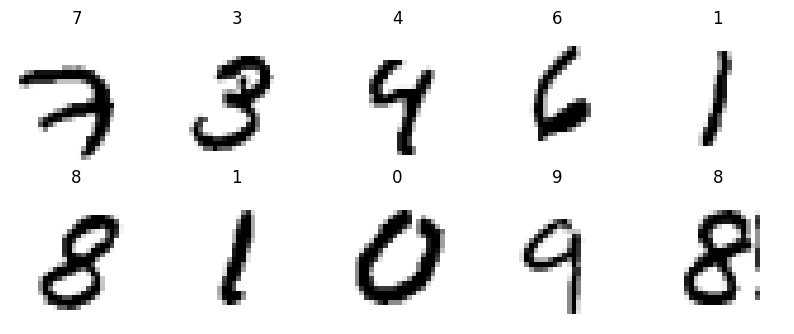

In [5]:
import matplotlib.pyplot as plt

#plot first 10 images with their labels
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="binary")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [6]:
#train a MLP with 2 hidden layers

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"])

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))






Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6066 - accuracy: 0.8407 - val_loss: 0.3116 - val_accuracy: 0.9122
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2872 - accuracy: 0.9182 - val_loss: 0.2437 - val_accuracy: 0.9348
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2352 - accuracy: 0.9331 - val_loss: 0.2041 - val_accuracy: 0.9430
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2006 - accuracy: 0.9432 - val_loss: 0.1783 - val_accuracy: 0.9500
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1752 - accuracy: 0.9501 - val_loss: 0.1578 - val_accuracy: 0.9568
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1552 - accuracy: 0.9564 - val_loss: 0.1464 - val_accuracy: 0.9596
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1387 - accuracy: 0.9615 - val_loss: 0.1337 - val_accuracy:

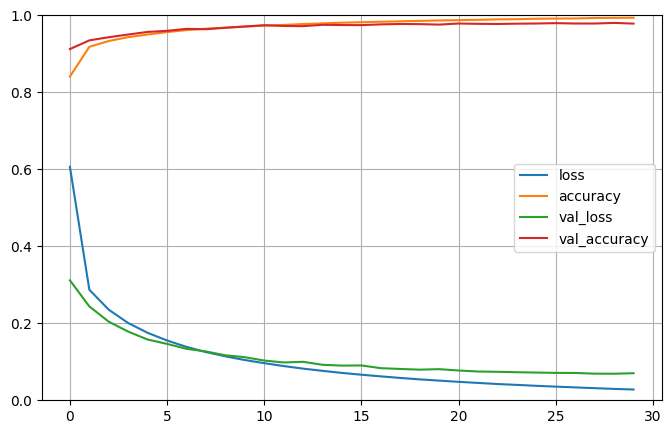

In [7]:
#plot learning curves
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [8]:
#evaluate model on test set
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9786


[0.07140990346670151, 0.978600025177002]

In [13]:
#save model
model.save("mnistMLP.h5")